In [4]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [5]:
dataset= MNIST(root='.', download=True)

100.1%

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


113.5%

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


100.4%

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


180.4%

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [6]:
len(dataset)

60000

In [7]:
test_dataset= MNIST(root='.', train=False)
len(test_dataset)

10000

In [8]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FEA6607BB10>, 5)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Label 5


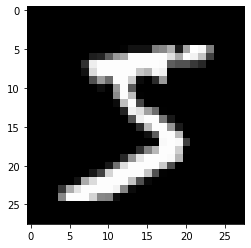

In [11]:
image, label=dataset[0]
plt.imshow(image, cmap='gray')
print('Label',label)

In [12]:
import torchvision.transforms as transforms

In [13]:
dataset= MNIST(root='.', 
              train=True,
              transform=transforms.ToTensor())

In [15]:
img_tensor, label= dataset[0]
print(img_tensor, label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


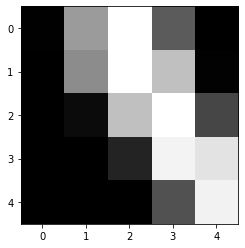

In [21]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')
print(img_tensor[:,10:15,10:15])

In [22]:
from torch.utils.data import random_split

#検証用データとトレーニングデータの分類
train_ds, val_ds= random_split(dataset, [50000, 10000])

len(train_ds), len(val_ds)

(50000, 10000)

In [23]:
from torch.utils.data import DataLoader

batch_size= 128

#教師と特徴量の紐付け行う。
train_ds= DataLoader(train_ds, batch_size, shuffle=True)
val_ds= DataLoader(val_ds, batch_size)


In [25]:
#Modelの作成を行う
import torch.nn as nn

input_size= 28*28
num_classes= 10 

#Logistic regression model 
model = nn.Linear(input_size, num_classes)


In [26]:
print(model.bias.shape)

torch.Size([10])


In [29]:
for images, labels in train_ds:
    print(labels)
    print(images.shape)
    break

tensor([5, 7, 6, 6, 1, 2, 7, 5, 4, 0, 8, 5, 3, 7, 8, 3, 7, 4, 0, 1, 2, 7, 3, 5,
        4, 7, 5, 7, 5, 3, 7, 9, 2, 1, 8, 8, 2, 9, 5, 9, 9, 8, 0, 1, 3, 1, 0, 7,
        0, 6, 0, 6, 9, 4, 7, 2, 3, 2, 8, 3, 4, 3, 7, 9, 5, 9, 2, 8, 2, 9, 2, 7,
        3, 4, 2, 4, 2, 4, 4, 2, 5, 8, 9, 3, 0, 6, 9, 3, 4, 0, 6, 5, 7, 6, 1, 8,
        9, 2, 3, 1, 0, 9, 7, 2, 9, 0, 7, 1, 3, 7, 0, 1, 9, 7, 6, 0, 6, 8, 8, 2,
        0, 8, 8, 0, 1, 0, 5, 7])
torch.Size([128, 1, 28, 28])


In [30]:
class MnistModel(nn.Module):#オーバーライドを行っている。
    def __init__(self):
        #引き継ぐ
        super().__init__()
        self.linear= nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb= xb.reshape(-1, 784)
        out= self.linear(xb)
        return out 
    
model= MnistModel()


In [ ]:
for images ,label in train_loadel: #
    outputs= model(images)
    